# Eduardo Garduño Martínez

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from numpy.random import normal
from scipy.stats import norm
import statistics

# Ejercicio 1

In [2]:
df = pd.read_csv('carc B.txt',header=None,delimiter = ' ')

In [3]:
df2 = pd.read_csv('SwissBank 1.txt',header=None,delimiter='\t')
df2['Tipo'] = 'Verdaderos'
for j in range(100,df2.shape[0]):
    df2.iloc[j,6] = 'Falsos'

df2['c'] = 0
for j in range(100,df2.shape[0]):
    df2.iloc[j,7] = 1

df2

,0,1,2,3,4,5,Tipo,c
0,214.8,131.0,131.1,9.0,9.7,141.0,Verdaderos,0
1,214.6,129.7,129.7,8.1,9.5,141.7,Verdaderos,0
2,214.8,129.7,129.7,8.7,9.6,142.2,Verdaderos,0
3,214.8,129.7,129.6,7.5,10.4,142.0,Verdaderos,0
4,215.0,129.6,129.7,10.4,7.7,141.8,Verdaderos,0
...,...,...,...,...,...,...,...,...
195,215.0,130.4,130.3,9.9,12.1,139.6,Falsos,1
196,215.1,130.3,129.9,10.3,11.5,139.7,Falsos,1
197,214.8,130.3,130.4,10.6,11.1,140.0,Falsos,1
198,214.7,130.7,130.8,11.2,11.2,139.4,Falsos,1


In [4]:
df4 = pd.read_csv('cars.dat', header = None, delimiter = '  ')
df4

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


,0,1,2,3,4,5,6,7,8
0,A100,3.9,2.8,2.2,4.2,3.0,3.1,2.4,2.8
1,BMW3,4.8,1.6,1.9,5.0,2.0,2.5,1.6,2.8
2,CiAX,3.0,3.8,3.8,2.7,4.0,4.4,4.0,2.6
3,Ferr,5.3,2.9,2.2,5.9,1.7,1.1,3.3,4.3
4,FiUn,2.1,3.9,4.0,2.6,4.5,4.4,4.4,2.2
5,FoFi,2.3,3.1,3.4,2.6,3.2,3.3,3.6,2.8
6,Hyun,2.5,3.4,3.2,2.2,3.3,3.3,3.3,2.4
7,Jagu,4.6,2.4,1.6,5.5,1.3,1.6,2.8,3.6
8,Lada,3.2,3.9,4.3,2.0,4.3,4.5,4.7,2.9
9,Mazd,2.6,3.3,3.7,2.8,3.7,3.0,3.7,3.1


In [5]:
X1 = df.values

In [6]:
X2 = df2.loc[:,[0,5]].values

In [7]:
def media(X):
    resultado = []
    for j in range(X.shape[1]):
        resultado.append(np.sum(X[:,j])/X.shape[0])
    return resultado


def mediana(X):
    X_ = []
    resultado = []

    for j in range(X.shape[1]):
        X_.append(sorted(list(X[:,j])))


    if (X.shape[0]+1) % 2 == 1:
        j = (X.shape[0] // 2)

        for k in range(X.shape[1]):
            resultado.append(X_[k][j])

    else:
        j = X.shape[0] // 2

        for k in range(X.shape[1]):
            a_ = (X_[k][j] + X_[k][j+1]) / 2
            resultado.append(a_)

    return resultado, j

def FL(X):
    X_ = []
    j = mediana(X)[1]
    j -= 1
    for k in range(X.shape[1]):
        X_.append(sorted(list(X[:,k])))
    X_ = np.array(X_).T
    resultado = mediana(X_[:j,:])[0]
    return resultado


def FU(X):
    X_ = []
    j = mediana(X)[1]
    j -= 2
    for k in range(X.shape[1]):
        X_.append(sorted(list(X[:,k])))
    X_ = np.array(X_).T
    resultado = mediana(X_[j:,:])[0]
    return resultado

def bu(X):
    Fu = np.array(FU(X))
    Fl = np.array(FL(X))
    rango = Fu - Fl
    resultado = Fu + (rango*1.5)
    return resultado
    

def bl(X):
    Fu = np.array(FU(X))
    Fl = np.array(FL(X))
    rango = Fu - Fl
    resultado = Fl - (rango*1.5)
    return resultado

def x_sup_ast(X):
    resultado = []
    bu_ = bu(X)
    for k in range(X.shape[1]):
        resultado.append(np.max(X[:,k][X[:,k] < bu_[k]]))
    return resultado

def x_sub_ast(X):
    resultado = []
    bl_ = bl(X)
    for k in range(X.shape[1]):
        resultado.append(np.min(X[:,k][X[:,k] > bl_[k]]))
    return resultado

def estadisticas (X):
    print('Medias: \n',media(X))
    print('Medianas: \n',mediana(X)[0])
    print('FL: \n', FL(X))
    print('FU: \n', FU(X))
    print('BL: \n', bl(X))
    print('BU: \n', bu(X))
    print('x_sub_ast: \n', x_sub_ast(X))
    print('x_sup_ast: \n', x_sup_ast(X))

#Ejercicio 1

In [8]:
estadisticas(X1)

Medias: 
 [1.445945945945946, 21.324324324324323]
Medianas: 
 [1, 20]
FL: 
 [1, 18]
FU: 
 [2.0, 24.5]
BL: 
 [-0.5   8.25]
BU: 
 [ 3.5  34.25]
x_sub_ast: 
 [1, 12]
x_sup_ast: 
 [3, 34]


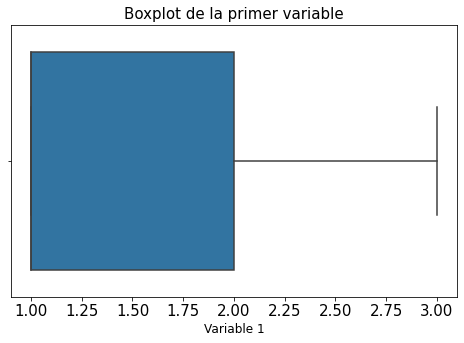

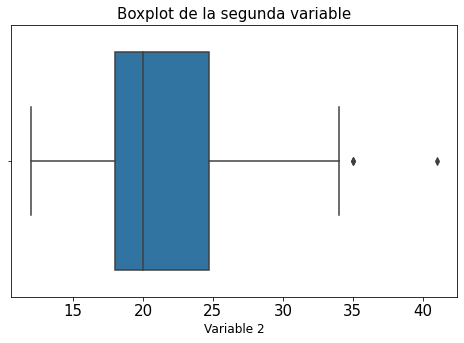

In [9]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df,x=0)
plt.title('Boxplot de la primer variable',fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Variable 1',fontsize=12)
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(data=df,x=1)
plt.title('Boxplot de la segunda variable',fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Variable 2',fontsize=12)
plt.show()

# Ejercicio 2

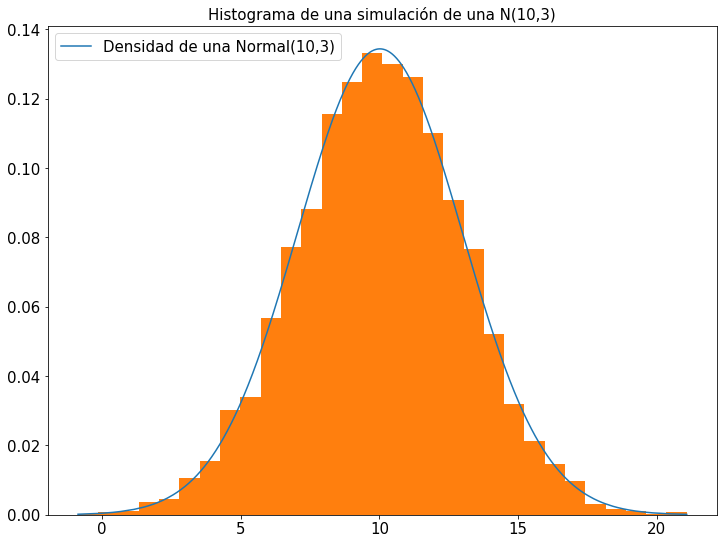

In [10]:
np.random.seed(10)
xn = normal(10,3,10000)
mean = statistics.mean(xn)
sd = statistics.stdev(xn)

plt.figure(figsize=(12,9))
plt.plot(np.sort(xn), norm.pdf(np.sort(xn), mean, sd),label='Densidad de una Normal(10,3)')
plt.hist(xn,bins=30,density=True)
plt.title('Histograma de una simulación de una N(10,3)',fontsize=15)
plt.legend(loc='upper left',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

# Ejercicio 2

In [11]:
estadisticas(X2)

Medias: 
 [214.896, 140.4835]
Medianas: 
 [214.9, 140.6]
FL: 
 [214.6, 139.5]
FU: 
 [215.1, 141.5]
BL: 
 [213.85 136.5 ]
BU: 
 [215.85 144.5 ]
x_sub_ast: 
 [213.9, 137.8]
x_sup_ast: 
 [215.7, 142.4]


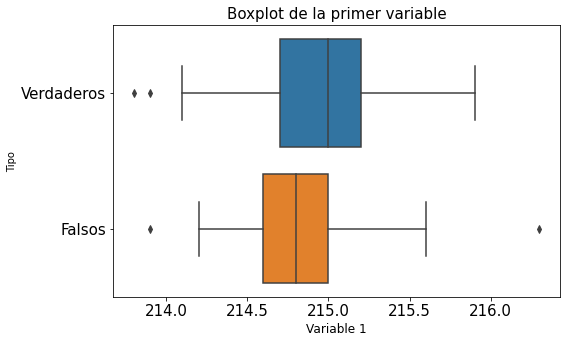

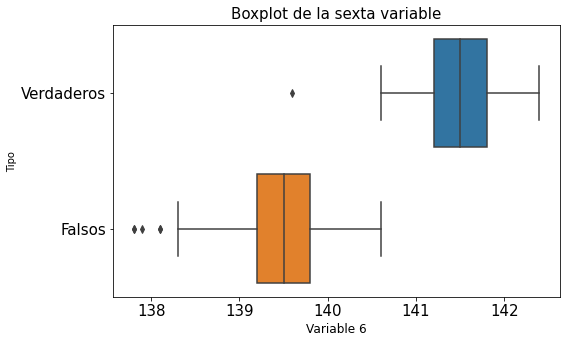

In [12]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df2,y='Tipo',x=0)
plt.title('Boxplot de la primer variable',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Variable 1',fontsize=12)
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(data=df2,y='Tipo',x=5)
plt.title('Boxplot de la sexta variable',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Variable 6',fontsize=12)
plt.show()

# Ejercicio 4

In [13]:
X4 = df2.iloc[:,:-2].values
X4

array([[214.8, 131. , 131.1,   9. ,   9.7, 141. ],
       [214.6, 129.7, 129.7,   8.1,   9.5, 141.7],
       [214.8, 129.7, 129.7,   8.7,   9.6, 142.2],
       ...,
       [214.8, 130.3, 130.4,  10.6,  11.1, 140. ],
       [214.7, 130.7, 130.8,  11.2,  11.2, 139.4],
       [214.3, 129.9, 129.9,  10.2,  11.5, 139.6]])

In [14]:
np.mean(X4, axis=0)

array([214.896 , 130.1215, 129.9565,   9.4175,  10.6505, 140.4835])

In [15]:
cov = np.cov(X4.T)
cov

array([[ 0.14179296,  0.03144322,  0.02309146, -0.10324623, -0.0185407 ,
         0.08430553],
       [ 0.03144322,  0.13033945,  0.10842739,  0.21580276,  0.10503945,
        -0.20934196],
       [ 0.02309146,  0.10842739,  0.16327412,  0.28413191,  0.12999673,
        -0.2404701 ],
       [-0.10324623,  0.21580276,  0.28413191,  2.08687814,  0.16453894,
        -1.03699623],
       [-0.0185407 ,  0.10503945,  0.12999673,  0.16453894,  0.64472337,
        -0.54961482],
       [ 0.08430553, -0.20934196, -0.2404701 , -1.03699623, -0.54961482,
         1.32771633]])

In [16]:
valores, vectores = np.linalg.eig(cov)

In [17]:
valores

array([3.00030487, 0.93562052, 0.24341371, 0.19465874, 0.08521185,
       0.03551468])

In [18]:
print(vectores)

[[ 0.04377427  0.01070966  0.3263165   0.56169177  0.75257278  0.09809807]
 [-0.11216159  0.07144697  0.25896137  0.45545879 -0.34680082 -0.76651197]
 [-0.13919062  0.06628208  0.34473274  0.41532963 -0.53465173  0.63169678]
 [-0.76830499 -0.56307225  0.2180222  -0.18610822  0.09996771 -0.02221711]
 [-0.2017661   0.65928988  0.55668568 -0.45069851  0.10190229 -0.03485874]
 [ 0.57890193 -0.48854255  0.59176285 -0.25844832 -0.08445895 -0.04567946]]


In [19]:
X4_ = X4.copy()
X4_

array([[214.8, 131. , 131.1,   9. ,   9.7, 141. ],
       [214.6, 129.7, 129.7,   8.1,   9.5, 141.7],
       [214.8, 129.7, 129.7,   8.7,   9.6, 142.2],
       ...,
       [214.8, 130.3, 130.4,  10.6,  11.1, 140. ],
       [214.7, 130.7, 130.8,  11.2,  11.2, 139.4],
       [214.3, 129.9, 129.9,  10.2,  11.5, 139.6]])

In [20]:
X4_[:,0] = X4_[:,0]/10
X4_[:,1] = X4_[:,0]/10
X4_[:,2] = X4_[:,0]/10
X4_[:,5] = X4_[:,0]/10
X4_

array([[21.48 ,  2.148,  2.148,  9.   ,  9.7  ,  2.148],
       [21.46 ,  2.146,  2.146,  8.1  ,  9.5  ,  2.146],
       [21.48 ,  2.148,  2.148,  8.7  ,  9.6  ,  2.148],
       ...,
       [21.48 ,  2.148,  2.148, 10.6  , 11.1  ,  2.148],
       [21.47 ,  2.147,  2.147, 11.2  , 11.2  ,  2.147],
       [21.43 ,  2.143,  2.143, 10.2  , 11.5  ,  2.143]])

In [21]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X4)
X_pca

array([[-5.49648099e-01,  5.06373006e-01,  2.75864575e-01],
       [-2.01862924e+00,  6.61263637e-01, -5.01997459e-01],
       [-1.83567546e+00,  1.17530734e+00,  4.56291515e-02],
       [-2.49436724e+00, -1.18891563e-01,  7.65252114e-02],
       [-7.01322819e-01,  3.19476668e+00, -8.38773875e-01],
       [-8.45845968e-01,  4.82494017e-01,  7.70296914e-01],
       [-2.15605260e+00,  4.38516644e-01, -3.07217041e-01],
       [-2.54441845e+00, -5.95292540e-01, -2.61088782e-01],
       [-1.80171073e+00, -1.55434257e-01,  4.93392385e-01],
       [-3.57945850e-01,  3.66247704e-01,  8.30944844e-03],
       [-1.65490951e+00, -9.50213178e-01,  1.35481703e+00],
       [-2.47187462e+00,  3.65789022e-02,  3.40253464e-01],
       [-1.65312961e+00, -5.33379672e-01,  4.46734754e-01],
       [-2.04785612e+00, -4.88042059e-01,  2.22785259e-01],
       [-2.12100032e+00, -3.91832074e-01,  4.08611849e-01],
       [-1.21102652e+00,  1.93468402e+00, -8.28495022e-01],
       [-1.80316035e+00,  4.78981674e-01

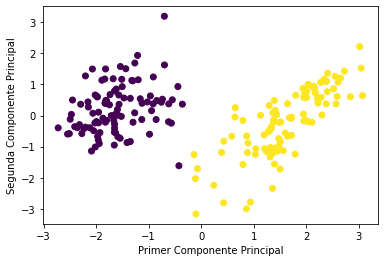

In [22]:
plt.scatter(X_pca[:,0],X_pca[:,1],c=df2.iloc[:,-1].values)
plt.xlabel('Primer Componente Principal')
plt.ylabel('Segunda Componente Principal')
plt.show()

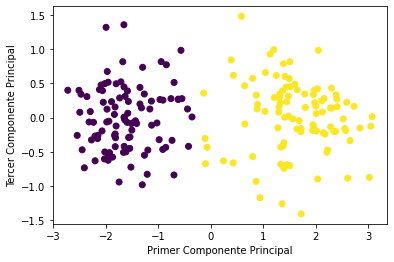

In [23]:
plt.scatter(X_pca[:,0],X_pca[:,2],c=df2.iloc[:,-1].values)
plt.xlabel('Primer Componente Principal')
plt.ylabel('Tercer Componente Principal')
plt.show()

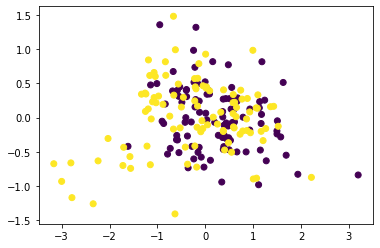

In [24]:
plt.scatter(X_pca[:,1],X_pca[:,2],c=df2.iloc[:,-1].values)
plt.show()

In [25]:
pca2 = PCA(n_components=3)
X_pca2 = pca.fit_transform(X4_)
X_pca2

array([[-5.21218374e-01,  8.97777205e-01, -1.33761352e-02],
       [-1.43783560e+00,  9.95747108e-01, -3.84114747e-02],
       [-8.30522867e-01,  9.63565180e-01, -1.50111985e-02],
       [-1.93341556e+00,  3.42605054e-02, -1.95431040e-02],
       [ 6.45987031e-01,  3.04195003e+00,  1.04234016e-02],
       [-4.76904451e-01,  5.00393565e-01,  7.86321172e-02],
       [-1.62584347e+00,  8.74088675e-01,  5.21162233e-02],
       [-2.19779123e+00, -2.97471006e-01, -5.09549858e-02],
       [-1.17071248e+00, -4.83595181e-01, -4.96553845e-03],
       [-2.89101540e-01,  6.22097281e-01,  2.86994427e-02],
       [-1.39067175e+00, -1.21273297e+00,  3.53333204e-02],
       [-1.72363503e+00, -4.26879769e-02,  1.20489933e-02],
       [-1.49136447e+00, -3.18401863e-01,  2.36783035e-02],
       [-1.67865497e+00, -4.40218784e-01, -2.78765809e-02],
       [-1.69005371e+00, -3.40802121e-01,  1.25510803e-02],
       [-3.57279212e-01,  2.12378323e+00, -4.43630497e-02],
       [-1.30488404e+00,  7.08827433e-01

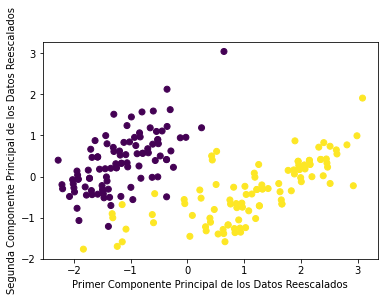

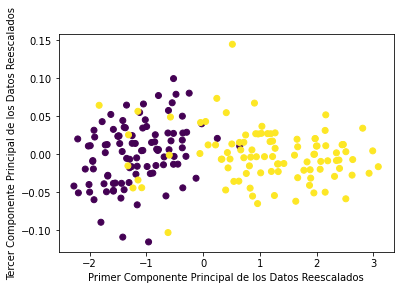

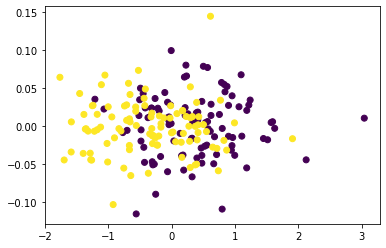

In [26]:
plt.scatter(X_pca2[:,0],X_pca2[:,1],c=df2.iloc[:,-1].values)
plt.xlabel('Primer Componente Principal de los Datos Reescalados')
plt.ylabel('Segunda Componente Principal de los Datos Reescalados')
plt.show()

plt.scatter(X_pca2[:,0],X_pca2[:,2],c=df2.iloc[:,-1].values)
plt.xlabel('Primer Componente Principal de los Datos Reescalados')
plt.ylabel('Tercer Componente Principal de los Datos Reescalados')
plt.show()

plt.scatter(X_pca2[:,1],X_pca2[:,2],c=df2.iloc[:,-1].values)
plt.show()

# Ejercicio 7

In [27]:
X5 = df4.iloc[:,1:].values
X5

array([[3.9, 2.8, 2.2, 4.2, 3. , 3.1, 2.4, 2.8],
       [4.8, 1.6, 1.9, 5. , 2. , 2.5, 1.6, 2.8],
       [3. , 3.8, 3.8, 2.7, 4. , 4.4, 4. , 2.6],
       [5.3, 2.9, 2.2, 5.9, 1.7, 1.1, 3.3, 4.3],
       [2.1, 3.9, 4. , 2.6, 4.5, 4.4, 4.4, 2.2],
       [2.3, 3.1, 3.4, 2.6, 3.2, 3.3, 3.6, 2.8],
       [2.5, 3.4, 3.2, 2.2, 3.3, 3.3, 3.3, 2.4],
       [4.6, 2.4, 1.6, 5.5, 1.3, 1.6, 2.8, 3.6],
       [3.2, 3.9, 4.3, 2. , 4.3, 4.5, 4.7, 2.9],
       [2.6, 3.3, 3.7, 2.8, 3.7, 3. , 3.7, 3.1],
       [4.1, 1.7, 1.8, 4.6, 2.4, 3.2, 1.4, 2.4],
       [3.2, 2.9, 3.2, 3.5, 3.1, 3.1, 2.9, 2.6],
       [2.6, 3.3, 3.9, 2.1, 3.5, 3.9, 3.8, 2.4],
       [2.2, 2.4, 3. , 2.6, 3.2, 4. , 2.9, 2.4],
       [3.1, 2.6, 2.3, 3.6, 2.8, 2.9, 2.4, 2.4],
       [2.9, 3.5, 3.6, 2.8, 3.2, 3.8, 3.2, 2.6],
       [2.7, 3.3, 3.4, 3. , 3.1, 3.4, 3. , 2.7],
       [3.9, 2.8, 2.6, 4. , 2.6, 3. , 3.2, 3. ],
       [2.5, 2.9, 3.4, 3. , 3.2, 3.1, 3.2, 2.8],
       [3.6, 4.7, 5.5, 1.5, 4.1, 5.8, 5.9, 3.1],
       [3.8, 2.3, 1.

In [28]:
y5 = np.mean(X5, axis=1).reshape(23,1) // 1
y5

array([[3.],
       [2.],
       [3.],
       [3.],
       [3.],
       [3.],
       [2.],
       [2.],
       [3.],
       [3.],
       [2.],
       [3.],
       [3.],
       [2.],
       [2.],
       [3.],
       [3.],
       [3.],
       [3.],
       [4.],
       [2.],
       [2.],
       [4.]])

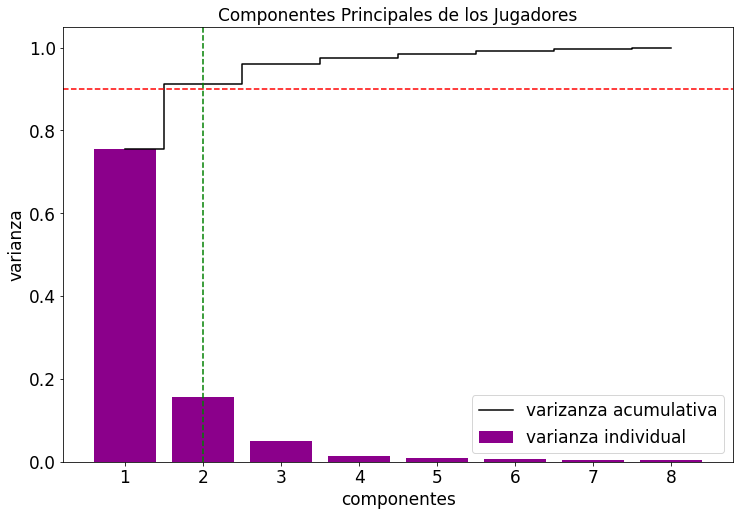

In [29]:
#Sacamos Matriz de Covarianza
cov_mat = np.cov(X5.T)

#Sacamos eigenvalores e eigenvectores de la matriz de covarianza
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
tot = sum(eigen_vals)

#Ordenamos los eigenvalores de acuerdo a su magnitud
var_exp = [ev/tot for ev in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

#Creamos la grafica de la varianza de las componentes principales
plt.figure(figsize=(12,8))
plt.bar(range(1,9),var_exp, label="varianza individual", align = "center",color='darkmagenta')
plt.step(range(1,9), cum_var_exp, where="mid", label="varizanza acumulativa",color='black')
plt.axhline(y=0.90,color='red', linestyle='--')
plt.axvline(x=2,color='green', linestyle='--')
plt.xlabel("componentes",fontsize=17)
plt.ylabel("varianza",fontsize=17)
plt.title("Componentes Principales de los Jugadores",fontsize=17)
plt.legend(loc = "lower right",fontsize=17)
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.show()

In [30]:
X5_pca = PCA(n_components=2).fit_transform(X5)
X5_pca

array([[-1.65553719e+00,  8.29761227e-03],
       [-3.63365046e+00,  1.98364133e-01],
       [ 1.77743257e+00, -2.43531207e-03],
       [-3.59179101e+00,  2.93775321e+00],
       [ 2.48039069e+00, -5.30408590e-01],
       [ 7.29044134e-01, -4.95413854e-01],
       [ 7.91859361e-01, -8.13612459e-01],
       [-3.80591843e+00,  1.57468706e+00],
       [ 2.74642940e+00,  4.45605707e-01],
       [ 8.50481479e-01,  1.82356082e-02],
       [-2.97759634e+00, -7.45276909e-01],
       [-4.48996012e-01, -2.14618057e-01],
       [ 1.60345349e+00, -5.56640611e-01],
       [ 3.42569182e-01, -1.45786431e+00],
       [-1.34846674e+00, -7.73860041e-01],
       [ 7.40701276e-01, -3.15210082e-01],
       [ 2.67533219e-01, -4.29606611e-01],
       [-1.22347162e+00,  5.71343548e-01],
       [ 1.88997309e-01, -4.75975126e-01],
       [ 4.60606374e+00,  1.47128192e+00],
       [-2.02196401e+00, -9.04802988e-01],
       [-7.31098749e-01, -1.35098888e+00],
       [ 4.31353472e+00,  1.84114502e+00]])

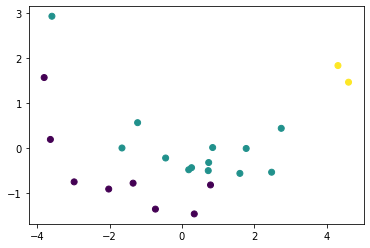

In [31]:
plt.scatter(X5_pca[:,0],X5_pca[:,1],c=y5)
plt.show()